<a href="https://colab.research.google.com/github/Marlianur09/Tugas_Praktikum_023_043/blob/main/Kegiatan_modul_2_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install -q kaggle==1.5.8

     |████████████████████████████████| 59 kB 2.5 MB/s 


In [8]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ernowogordonunus","key":"4e5bd4832ee7c94fa76767b83964e5ef"}'}

In [9]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 72 Nov  8 11:39 kaggle.json


In [11]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [12]:
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
api_token = {"username":"ernowogordonunus","key":"4e5bd4832ee7c94fa76767b83964e5ef"}
import json
import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [14]:
!kaggle competitions download -c aptos2019-blindness-detection

100% 9.51G/9.51G [03:42<00:00, 55.3MB/s]
100% 9.51G/9.51G [03:42<00:00, 45.8MB/s]


In [15]:
!unzip \*.zip &> /dev/null && rm *.zip

In [16]:
!ls 


kaggle.json  sample_submission.csv  test_images  train_images
sample_data  test.csv		    train.csv


In [17]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [18]:
train_dir = 'train_images'
test_dir = 'test_images'

In [19]:
train_csv=pd.read_csv('train.csv')
test_csv=pd.read_csv('test.csv')

In [20]:
train=[]
trainlabel=[]
for im in tqdm(os.listdir(train_dir)):
    image=load_img(os.path.join(train_dir,im), grayscale=False, color_mode='rgb', target_size=(60,60))
    image=img_to_array(image)
    image=image/255.0
    train+=[image]
    trainlabel+=[train_csv[train_csv['id_code']==im[0:-4]]['diagnosis'].iat[0]]

100%|██████████| 3662/3662 [08:17<00:00,  7.37it/s]


In [21]:
test=[]
for im in tqdm(os.listdir(test_dir)):
    image=load_img(os.path.join(test_dir,im), grayscale=False, color_mode='rgb', target_size=(60,60))
    image=img_to_array(image)
    image=image/255.0
    test+=[image]

100%|██████████| 1928/1928 [01:25<00:00, 22.56it/s]


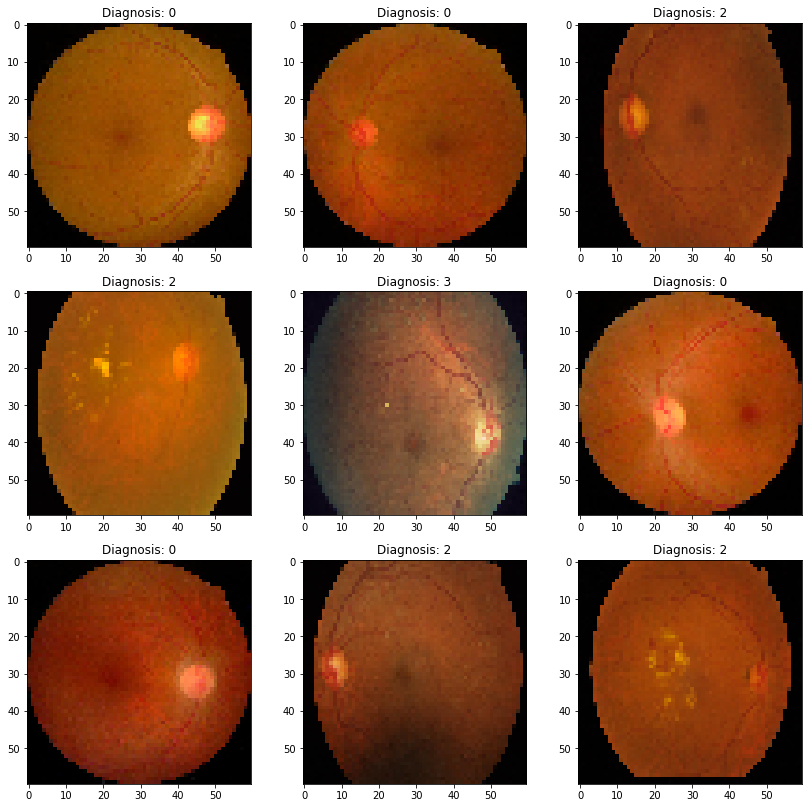

In [22]:
fig,axs = plt.subplots(3,3,figsize=(14,14))
for i in range(9):
    r=i//3
    c=i%3
    ax=axs[r][c].imshow(train[i])
    ax=axs[r][c].set_title('Diagnosis: '+str(trainlabel[i]))    
plt.show()

In [23]:
train=np.array(train)
trainlabel=np.array(trainlabel)
test=np.array(test)

In [24]:
trainlabel2=to_categorical(trainlabel)

In [25]:
trainx,testx,trainy,testy=train_test_split(train,trainlabel2,test_size=0.2,random_state=44)

In [26]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=20,
                             zoom_range=0.2,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.1,
                             fill_mode="nearest")

In [56]:
from tensorflow.keras.layers import BatchNormalization
# TULIS KODE ANDA DISINI
model = tf.keras.models.Sequential([
    # Konvulasi Pertama
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Konvulasi Kedua
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # Jadikan hasil yang sudah diperoleh dalam sebuah DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # Hidden Layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [28]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
print(trainx.shape)
print(trainy.shape)

(2929, 60, 60, 3)
(2929, 5)


In [30]:
print(testx.shape)
print(testy.shape)

(733, 60, 60, 3)
(733, 5)


In [34]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=100)

Epoch 1/100
92/92 [==============================] - 40s 423ms/step - loss: 1.5452 - accuracy: 0.5241 - val_loss: 1.8113 - val_accuracy: 0.2851
Epoch 2/100
92/92 [==============================] - 39s 419ms/step - loss: 1.0040 - accuracy: 0.6511 - val_loss: 2.0123 - val_accuracy: 0.2865
Epoch 3/100
92/92 [==============================] - 39s 418ms/step - loss: 0.9439 - accuracy: 0.6620 - val_loss: 2.0001 - val_accuracy: 0.2483
Epoch 4/100
92/92 [==============================] - 39s 421ms/step - loss: 0.9127 - accuracy: 0.6740 - val_loss: 1.3251 - val_accuracy: 0.3847
Epoch 5/100
92/92 [==============================] - 39s 425ms/step - loss: 0.8859 - accuracy: 0.6832 - val_loss: 1.1150 - val_accuracy: 0.6085
Epoch 6/100
92/92 [==============================] - 39s 419ms/step - loss: 0.8400 - accuracy: 0.6972 - val_loss: 0.9221 - val_accuracy: 0.7040
Epoch 7/100
92/92 [==============================] - 39s 419ms/step - loss: 0.8542 - accuracy: 0.6948 - val_loss: 0.8729 - val_accuracy:

In [35]:
score = model.evaluate(trainx, trainy)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

92/92 [==============================] - 8s 87ms/step - loss: 0.5973 - accuracy: 0.7791
Loss: 0.60
Accuracy: 0.78


In [36]:
score = model.evaluate(testx, testy)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

23/23 [==============================] - 2s 87ms/step - loss: 0.6864 - accuracy: 0.7367
Loss: 0.69
Accuracy: 0.74


In [60]:
# TULIS KODE ANDA DISINI
model2 = tf.keras.models.Sequential([
    # Konvulasi Pertama
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.AveragePooling2D(2, 2),
    # Konvulasi Kedua
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.AveragePooling2D(2,2),
    # Jadikan hasil yang sudah diperoleh dalam sebuah DNN
    tf.keras.layers.Flatten(),
    # Hidden Layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [61]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [62]:
print(trainx.shape)
print(trainy.shape)

(2929, 60, 60, 3)
(2929, 5)


In [63]:
print(testx.shape)
print(testy.shape)

(733, 60, 60, 3)
(733, 5)


In [64]:
his2=model2.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=100)

Epoch 1/100
92/92 [==============================] - 29s 315ms/step - loss: 1.0778 - accuracy: 0.5975 - val_loss: 0.9368 - val_accuracy: 0.6508
Epoch 2/100
92/92 [==============================] - 28s 309ms/step - loss: 0.9048 - accuracy: 0.6852 - val_loss: 0.8269 - val_accuracy: 0.7067
Epoch 3/100
92/92 [==============================] - 28s 308ms/step - loss: 0.8592 - accuracy: 0.6876 - val_loss: 0.8469 - val_accuracy: 0.6849
Epoch 4/100
92/92 [==============================] - 29s 310ms/step - loss: 0.8583 - accuracy: 0.7002 - val_loss: 0.8291 - val_accuracy: 0.7121
Epoch 5/100
92/92 [==============================] - 29s 310ms/step - loss: 0.8479 - accuracy: 0.7009 - val_loss: 0.7982 - val_accuracy: 0.7121
Epoch 6/100
92/92 [==============================] - 29s 310ms/step - loss: 0.8321 - accuracy: 0.7095 - val_loss: 0.8273 - val_accuracy: 0.7080
Epoch 7/100
92/92 [==============================] - 28s 309ms/step - loss: 0.8283 - accuracy: 0.7125 - val_loss: 0.8156 - val_accuracy:

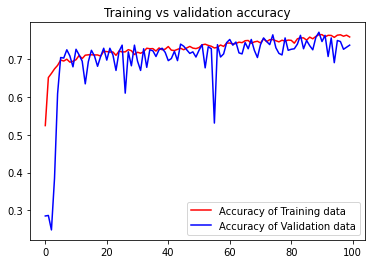

<Figure size 432x288 with 0 Axes>

In [67]:
#model1
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

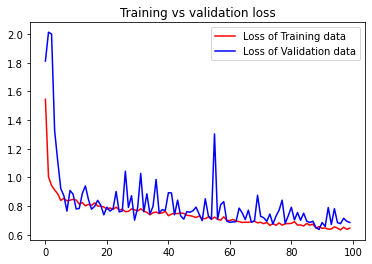

<Figure size 432x288 with 0 Axes>

In [68]:
#model1
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

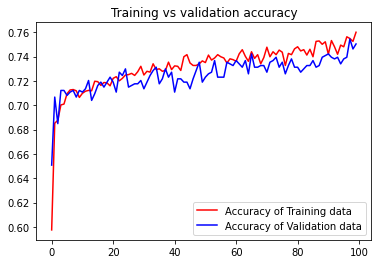

<Figure size 432x288 with 0 Axes>

In [69]:
#model2
get_acc = his2.history['accuracy']
value_acc = his2.history['val_accuracy']
get_loss = his2.history['loss']
validation_loss = his2.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7fd24364df80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


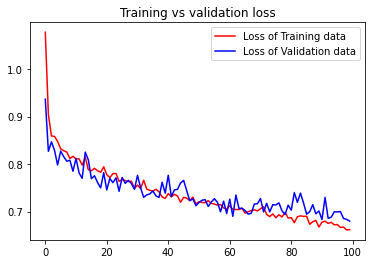

<Figure size 432x288 with 0 Axes>

In [70]:
#model2
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [72]:
# save model and architecture to si
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [73]:
# save model and architecture to single file
model2.save("model2.h5")
print("Saved model to disk")

Saved model to disk
